In [17]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd

dataset = pd.read_csv('calculate_shuffle_distance_bones.csv')
# iris = load_iris(as_frame=True)
# X = iris.data[["sepal length (cm)", "sepal width (cm)"]]
# y = iris.target
# print(dataset.iloc[:, -1].unique())
print(dataset.columns)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

Index(['wrist_thumb0', 'wrist_thumb1', 'wrist_thumb2', 'wrist_thumb3',
       'wrist_index1', 'wrist_index2', 'wrist_index3', 'wrist_middle1',
       'wrist_middle2', 'wrist_middle3', 'wrist_ring1', 'wrist_ring2',
       'wrist_ring3', 'wrist_pinky1', 'wrist_pinky2', 'wrist_pinky3', 'Sign'],
      dtype='object')


In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))]
)

ValueError: n_features must be equal to 2. Got 16 instead.

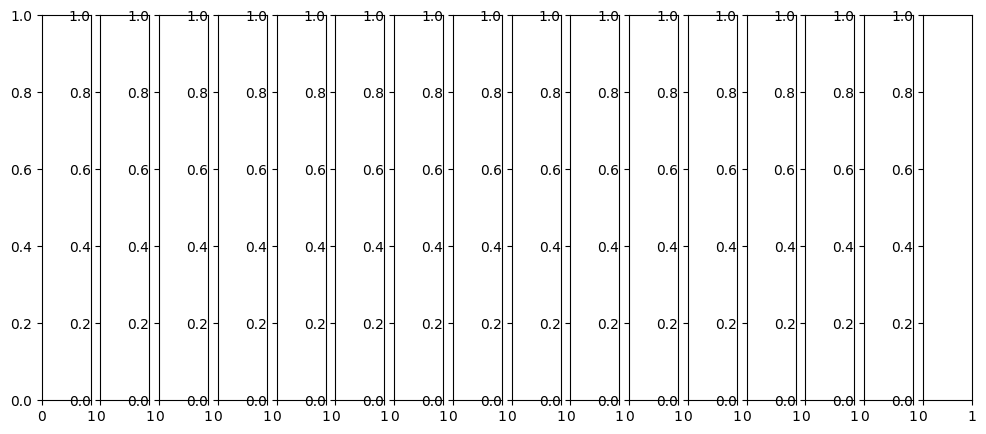

In [18]:
import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay

_, axs = plt.subplots(ncols=16, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=dataset.columns[0],
        ylabel=dataset.columns[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        dataset.iloc[:, -1].unique(),
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification

# Generate sample data (replace this with your actual dataset)
# X, y = make_classification(n_samples=1000, n_features=16, n_classes=3, n_clusters_per_class=1)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create KNeighborsClassifier model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Train the model
knn_model.fit(X_train, y_train)

# Evaluate the model
accuracy = knn_model.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.9833333333333333


In [28]:
d = 250
print(X[d])
print(y[d])
print(knn_model.predict([X[d]]))

[0.02614065 0.04852969 0.08149    0.1155533  0.10190149 0.1160985
 0.0941752  0.09838805 0.11096662 0.08678643 0.09318216 0.10614858
 0.08470459 0.0889438  0.11663967 0.13486271]
phone
['phone']


In [26]:
from joblib import dump
dump(knn_model,'classifier.joblib')

['classifier.joblib']

In [27]:
X[d]

array([0.02614065, 0.04852969, 0.08149   , 0.1155533 , 0.10190149,
       0.1160985 , 0.0941752 , 0.09838805, 0.11096662, 0.08678643,
       0.09318216, 0.10614858, 0.08470459, 0.0889438 , 0.11663967,
       0.13486271])